In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from finlib.tick_data import read_csv
from finlib.bars import time_bars, tick_bars

import matplotlib.pyplot as plt

tick_data = read_csv('/home/victorvalentee/python_projects/data/test/binance_ticks.csv')

In [21]:
tick_data.head()

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
1,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
3,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
4,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True


In [3]:
time_bars(tick_data, '1S')

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7196.25,7196.25,7195.24,0.250798,1804.802077,0.250000,1.0
1,2020-01-01 00:00:01.503,7195.25,7196.24,7196.24,7195.24,1.293336,9306.356791,0.058824,1.0
2,2020-01-01 00:00:02.623,7196.22,7195.24,7196.24,7195.24,0.528896,3805.940374,0.166667,1.0
3,2020-01-01 00:00:03.420,7195.83,7195.83,7195.83,7195.83,0.089730,645.681826,0.000000,1.0
4,2020-01-01 00:00:04.458,7195.24,7195.24,7195.24,7195.24,0.150432,1082.394344,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
44903,2020-01-01 12:28:23.120,7213.23,7213.08,7213.23,7213.08,0.093954,677.698766,0.250000,1.0
44904,2020-01-01 12:28:24.244,7213.08,7212.69,7213.08,7210.63,0.788641,5687.701226,0.727273,1.0
44905,NaT,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
44906,2020-01-01 12:28:26.092,7212.06,7212.12,7212.16,7211.97,1.107114,7984.493605,0.000000,1.0


In [33]:
tick_bars_ = tick_bars(tick_data, n=500)

tick_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7186.60,7196.25,7183.14,52.455597,377074.939211,0.566,1.0
1,2020-01-01 00:01:02.711,7186.60,7181.60,7188.94,7180.26,29.740348,213653.901079,0.470,1.0
2,2020-01-01 00:04:17.169,7181.60,7184.60,7184.62,7178.20,44.639747,320546.053786,0.476,1.0
3,2020-01-01 00:08:02.576,7184.21,7190.13,7193.53,7183.45,47.826586,343802.489143,0.436,1.0
4,2020-01-01 00:11:42.518,7190.13,7183.36,7190.28,7180.24,32.543135,233781.061902,0.538,1.0
...,...,...,...,...,...,...,...,...,...
215,2020-01-01 12:09:47.207,7214.78,7212.64,7216.76,7206.00,60.361928,435340.495673,0.488,1.0
216,2020-01-01 12:12:47.545,7212.90,7207.28,7213.83,7203.62,35.866080,258529.142487,0.426,1.0
217,2020-01-01 12:16:41.528,7206.80,7218.05,7218.10,7206.80,45.690367,329578.744300,0.396,1.0
218,2020-01-01 12:20:45.843,7217.87,7219.57,7220.00,7215.00,40.328536,291062.291457,0.548,1.0


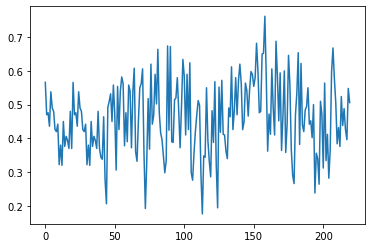

In [34]:
tick_bars_['buyer_maker_pct'].plot();

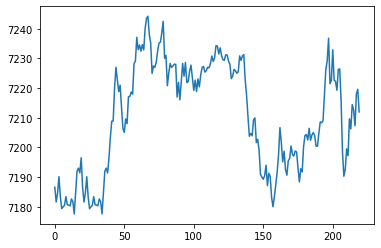

In [35]:
tick_bars_['close'].plot();

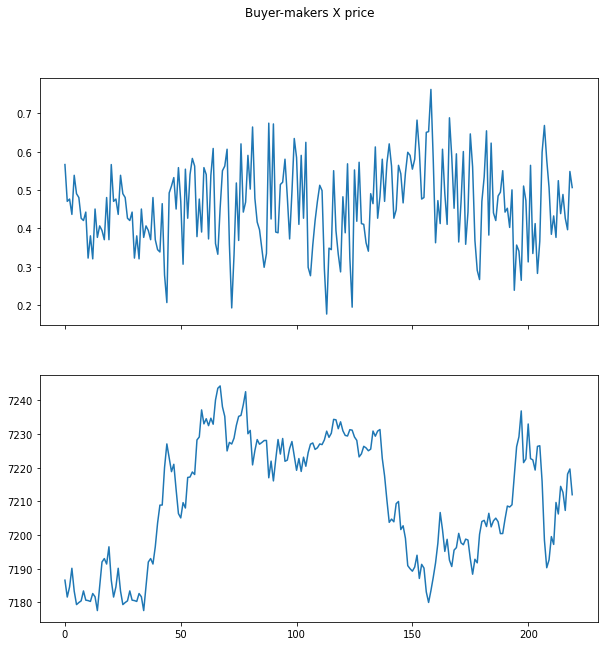

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
fig.suptitle('Buyer-makers X price')
ax1.plot(tick_bars_['buyer_maker_pct'])
ax2.plot(tick_bars_['close'])
plt.show()